In [46]:
import os
import sys
# Add src/ to sys.path (relative to current notebook)
sys.path.append(os.path.abspath("../../src"))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib

from utils.DataAnalysis import TableAnalysis, MyCustomException
from utils.VariableAnalysis import UnivariateAnalysis,BivariateAnalysis
from utils.pdf_file_save import PDFReportWriter

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [47]:
file_path = pathlib.Path('D:\Capstone Project\dataset\House_Price_dataset')
df = pd.read_csv(f"{file_path}/7.gurgaon_properties_outlier_treated.csv")
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,apna enclave,sector 3,8.0,6153.0,13002.0,Super Built up area 1300(120.77 sq.m.)Built Up...,3.0,3.0,1,0.0,NaN,Old Property,1300.0,1000.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4334.000000
1,flat,la vida by tata housing,sector 113,2.0,11344.0,1763.0,Super Built up area 2690(249.91 sq.m.)Built Up...,3.0,3.0,3,3.0,North,New Property,2690.0,2599.0,2450.0,1.0,1.0,0.0,0.0,0.0,1.0,174.0,587.666667
2,flat,g l s arawali homes,sohna road,2.0,4513.0,4432.0,Super Built up area 576(53.51 sq.m.),2.0,2.0,2,1.0,NaN,Moderately Old,576.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2216.000000
3,flat,tarc maceo,sector 91,9.0,5413.0,16627.0,Super Built up area 1404(130.44 sq.m.),2.0,2.0,3+,8.0,East,Moderately Old,1404.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,85.0,8313.500000
4,flat,bptp terra,sector 37d,1.0,7530.0,1328.0,Super Built up area 2191(203.55 sq.m.)Built Up...,4.0,3.0,3+,6.0,West,Relatively New,2191.0,2091.0,1991.0,0.0,0.0,0.0,0.0,0.0,0.0,149.0,332.000000


In [48]:
df.shape

(3547, 24)

In [49]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1008
agePossession             0
super_built_up_area    1676
built_up_area          1963
carpet_area            1714
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

## -----------------------Built up area Value Imputation --------------------------------

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

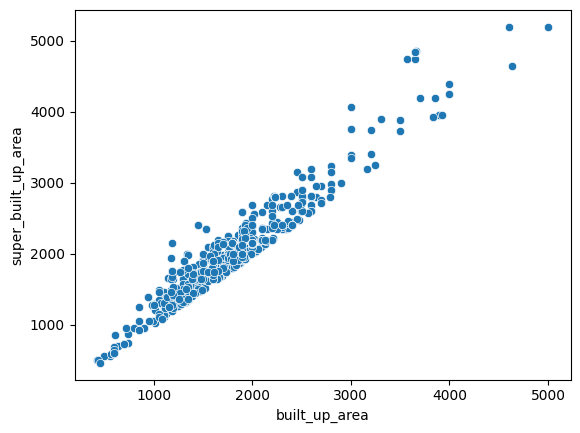

In [50]:
## Relationship between built_up_area and super_built_up_area
sns.scatterplot(x=df['built_up_area'],y=df['super_built_up_area'])

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

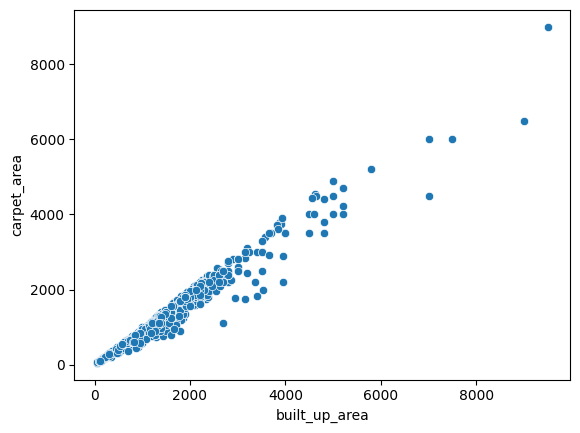

In [51]:
## Relationship between built_up_area and carpet_area
sns.scatterplot(x=df['built_up_area'],y=df['carpet_area'])

In [52]:
## Fetching records where super_built_up_area, built_up_area, and carpet_area are Null

df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio


In [53]:
## Fetching records where super_built_up_area, built_up_area, and carpet_area are Not Null

all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]
all_present_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
1,flat,la vida by tata housing,sector 113,2.0,11344.0,1763.0,Super Built up area 2690(249.91 sq.m.)Built Up...,3.0,3.0,3,3.0,North,New Property,2690.0,2599.00,2450.00,1.0,1.0,0.0,0.0,0.0,1.0,174.0,587.666667
4,flat,bptp terra,sector 37d,1.0,7530.0,1328.0,Super Built up area 2191(203.55 sq.m.)Built Up...,4.0,3.0,3+,6.0,West,Relatively New,2191.0,2091.00,1991.00,0.0,0.0,0.0,0.0,0.0,0.0,149.0,332.000000
7,flat,emaar gurgaon greens,sector 102,1.0,8482.0,1179.0,Super Built up area 1650(153.29 sq.m.)Built Up...,3.0,3.0,3,10.0,East,Relatively New,1650.0,1300.00,1022.58,0.0,1.0,0.0,0.0,0.0,1.0,46.0,393.000000
25,flat,experion the heartsong,sector 108,1.0,6826.0,1465.0,Super Built up area 1758(163.32 sq.m.)Built Up...,3.0,3.0,3+,10.0,South,Relatively New,1758.0,1275.53,974.68,1.0,0.0,0.0,0.0,0.0,1.0,93.0,488.333333
32,flat,adani m2k oyster grande,sector 102,4.0,10000.0,4000.0,Super Built up area 4650(432 sq.m.)Built Up ar...,4.0,4.0,3+,11.0,North-East,Relatively New,4650.0,4630.00,4550.00,0.0,0.0,0.0,0.0,0.0,0.0,60.0,1000.000000


In [54]:
all_present_df.shape

(530, 24)

In [55]:
## Calulating Ratio Between super_built_up_area to built_up_area ratio

super_to_built_up_ratio = round((all_present_df['super_built_up_area']/all_present_df['built_up_area']).median(),3)
super_to_built_up_ratio

np.float64(1.106)

In [56]:
## Calulating Ratio Between carpet_area to built_up_area ratio
carpet_to_built_up_ratio = round((all_present_df['carpet_area']/all_present_df['built_up_area']).median(),3)
carpet_to_built_up_ratio

np.float64(0.9)

In [57]:
## Fetching records where super_built_up_area(Not Null), carpet_area(Not Null), and built_up_area(isNull)
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
8,flat,sbtl caladium,sector 109,1.0,7179.0,1393.0,Super Built up area 1880(174.66 sq.m.)Carpet a...,3.0,2.0,3+,12.0,West,Relatively New,1880.0,NaN,1128.00,0.0,0.0,0.0,0.0,0.0,1.0,128.0,464.333333
11,flat,umang winter hills,sector 77,1.0,7782.0,1285.0,Super Built up area 1735(161.19 sq.m.)Carpet a...,3.0,3.0,3+,7.0,NaN,New Property,1735.0,NaN,1199.00,0.0,0.0,1.0,0.0,0.0,0.0,96.0,428.333333
27,flat,shree vardhman victoria,sector 70,1.0,9234.0,1083.0,Super Built up area 1950(181.16 sq.m.)Carpet a...,3.0,4.0,3,2.0,South-West,New Property,1950.0,NaN,1161.00,0.0,1.0,0.0,0.0,1.0,1.0,45.0,361.000000
39,flat,mapsko mount ville,sector 79,1.0,8540.0,1171.0,Super Built up area 1815(168.62 sq.m.)Carpet a...,3.0,4.0,3,11.0,South-West,Relatively New,1815.0,NaN,1071.33,0.0,1.0,0.0,0.0,0.0,0.0,152.0,390.333333
41,flat,hero homes,sector 104,1.0,9569.0,1045.0,Super Built up area 1359(126.26 sq.m.)Carpet a...,3.0,2.0,2,18.0,East,New Property,1359.0,NaN,861.97,0.0,0.0,0.0,0.0,0.0,1.0,49.0,348.333333


In [58]:
## built_up_area value imputation logic [average of super_to_built_up_ratio + carpet_to_built_up_ratio]

calculated_built_up = (sbc_df['super_built_up_area']/super_to_built_up_ratio) + (sbc_df['carpet_area']/carpet_to_built_up_ratio)
calculated_built_up = round(calculated_built_up/2) ## Average

sbc_df['built_up_area'].fillna(calculated_built_up,inplace=True)
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
8,flat,sbtl caladium,sector 109,1.0,7179.0,1393.0,Super Built up area 1880(174.66 sq.m.)Carpet a...,3.0,2.0,3+,12.0,West,Relatively New,1880.0,1477.0,1128.00,0.0,0.0,0.0,0.0,0.0,1.0,128.0,464.333333
11,flat,umang winter hills,sector 77,1.0,7782.0,1285.0,Super Built up area 1735(161.19 sq.m.)Carpet a...,3.0,3.0,3+,7.0,NaN,New Property,1735.0,1450.0,1199.00,0.0,0.0,1.0,0.0,0.0,0.0,96.0,428.333333
27,flat,shree vardhman victoria,sector 70,1.0,9234.0,1083.0,Super Built up area 1950(181.16 sq.m.)Carpet a...,3.0,4.0,3,2.0,South-West,New Property,1950.0,1527.0,1161.00,0.0,1.0,0.0,0.0,1.0,1.0,45.0,361.000000
39,flat,mapsko mount ville,sector 79,1.0,8540.0,1171.0,Super Built up area 1815(168.62 sq.m.)Carpet a...,3.0,4.0,3,11.0,South-West,Relatively New,1815.0,1416.0,1071.33,0.0,1.0,0.0,0.0,0.0,0.0,152.0,390.333333
41,flat,hero homes,sector 104,1.0,9569.0,1045.0,Super Built up area 1359(126.26 sq.m.)Carpet a...,3.0,2.0,2,18.0,East,New Property,1359.0,1093.0,861.97,0.0,0.0,0.0,0.0,0.0,1.0,49.0,348.333333


In [59]:
## Update the df 
df.update(sbc_df)
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1008
agePossession             0
super_built_up_area    1676
built_up_area          1545
carpet_area            1714
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [60]:
## Fetching records where super_built_up_area(Not Null), built_up_area(is Null), carpet_area(is Null)
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]
sb_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
2,flat,g l s arawali homes,sohna road,2.0,4513.0,4432.0,Super Built up area 576(53.51 sq.m.),2.0,2.0,2,1.0,NaN,Moderately Old,576.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2216.000000
3,flat,tarc maceo,sector 91,9.0,5413.0,16627.0,Super Built up area 1404(130.44 sq.m.),2.0,2.0,3+,8.0,East,Moderately Old,1404.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,85.0,8313.500000
12,flat,dlf garden city floors,sector 92,1.0,8591.0,1164.0,Super Built up area 1630(151.43 sq.m.),3.0,4.0,2,1.0,NaN,Under Construction,1630.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,63.0,388.000000
13,flat,m3m heights,sector 65,3.0,17996.0,1667.0,Super Built up area 1828(169.83 sq.m.),3.0,3.0,3,20.0,South-East,Under Construction,1828.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,60.0,555.666667
17,flat,sare crescent parc,sector 92,5.0,5000.0,10000.0,Super Built up area 1000(92.9 sq.m.),2.0,2.0,2,2.0,NaN,Relatively New,1000.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,1.0,72.0,5000.000000


In [61]:
## built_up_area value imputation logic [super_built_up_area/super_to_built_up_ratio]
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/super_to_built_up_ratio),inplace=True)
df.update(sb_df)
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1008
agePossession             0
super_built_up_area    1676
built_up_area           670
carpet_area            1714
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [62]:
# Fetching Records super_built_up_area(isNull), built_up_area (isnull), and carpet_area(notNull)
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]
c_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
5,flat,godrej air,sector 85,1.0,13624.0,734.0,Carpet area: 92,2.0,2.0,3,19.0,NaN,Under Construction,NaN,NaN,92.0,0.0,0.0,0.0,0.0,0.0,1.0,44.0,367.000000
6,flat,wings apartment,sector 9,1.0,6667.0,1500.0,Carpet area: 1800 (167.23 sq.m.),4.0,3.0,2,4.0,South-East,Moderately Old,NaN,NaN,1800.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,375.000000
15,flat,raheja atharva,sector 109,2.0,9492.0,2107.0,Carpet area: 2318 (215.35 sq.m.),3.0,3.0,2,7.0,North,Moderately Old,NaN,NaN,2318.0,0.0,1.0,0.0,0.0,0.0,0.0,111.0,702.333333
16,flat,irwo westend towers,sector 47,6.0,12058.0,4976.0,Carpet area: 539 (50.07 sq.m.),1.0,1.0,2,3.0,NaN,Old Property,NaN,NaN,539.0,0.0,0.0,0.0,0.0,0.0,1.0,56.0,4976.000000
33,flat,breez global heights,sohna road,2.0,5329.0,3753.0,Carpet area: 394 (36.6 sq.m.),1.0,1.0,1,2.0,NaN,Relatively New,NaN,NaN,394.0,0.0,0.0,0.0,0.0,0.0,1.0,21.0,3753.000000


In [63]:
## built_up_area logic [carpet_area / carpet_to_built_up_ratio]
c_df['built_up_area'].fillna(round(c_df['carpet_area']/carpet_to_built_up_ratio),inplace=True)

## Data Frame Update 
df.update(c_df)
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1008
agePossession             0
super_built_up_area    1676
built_up_area             0
carpet_area            1714
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

#### built_up_area Vs price relationship

<Axes: xlabel='built_up_area', ylabel='price'>

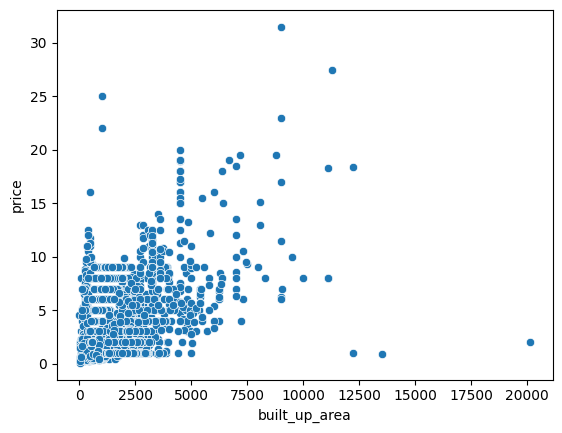

In [64]:
## Initial Visualization
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [65]:
## Anamoly Detection logic [built_up_area < 2000 and  price > 2.5 corer]
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]
anamoly_df.sample(5)

,price,area,built_up_area
1483,9.0,8490.0,827.0
2681,4.0,4434.0,581.0
650,3.0,7303.0,925.0
2869,9.0,14458.0,1185.0
2354,9.0,13524.0,1731.0


In [66]:
## Replace built_up_area value by area value in anamoly dataframe 
anamoly_df['built_up_area'] = anamoly_df['area']

## Updated df 
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

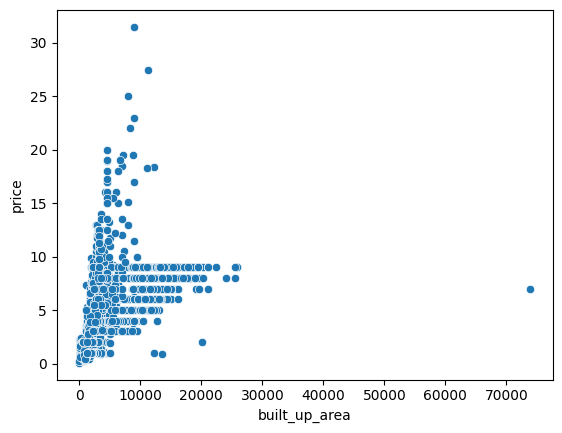

In [67]:
## Post anamoly update Visualization
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [68]:
## Dropping columns in main data frame 
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1008
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

## ------------------ floorNum value Imputation ------------------

In [69]:
## Fetching Floor Num missing 
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
65,house,dlf new town heights,sector 86,2.47,7719.0,4.0,4.0,3+,NaN,West,Moderately Old,2800.0,0.0,1.0,0.0,1.0,0.0,0.0,130.0
441,house,independent,sector 3,1.50,10288.0,3.0,3.0,0,NaN,NaN,Old Property,210.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
460,house,independent,sector 2,5.60,17284.0,8.0,6.0,3+,NaN,South-West,Moderately Old,3240.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
702,house,jacob pura,sector 12,0.35,9722.0,2.0,1.0,0,NaN,NaN,Old Property,360.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
725,house,independent,sector 4,0.65,11111.0,4.0,2.0,2,NaN,NaN,Moderately Old,585.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1048,house,independent,sector 25,13.00,45710.0,6.0,8.0,3+,NaN,NaN,Relatively New,2844.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0
1286,house,vipul tatvam villa,sector 48,8.50,26235.0,4.0,4.0,1,NaN,NaN,Relatively New,3240.0,0.0,0.0,0.0,0.0,0.0,1.0,21.0
1867,house,independent,sector 4,4.12,8889.0,2.0,1.0,3+,NaN,NaN,Moderately Old,4635.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1924,house,vipul tatvam villa,sector 48,8.50,26235.0,4.0,4.0,2,NaN,East,Moderately Old,3240.0,0.0,1.0,1.0,1.0,0.0,1.0,88.0
1935,flat,NaN,sector 78,6.00,3692.0,2.0,2.0,0,NaN,NaN,Under Construction,16251.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [70]:
## Calculating the floor value median value where property_type == house
floor_num_calculated_median = df[df['property_type'] == 'house']['floorNum'].median()
floor_num_calculated_median

np.float64(2.0)

In [71]:
## Imputing Floor Num Missing Value
df['floorNum'].fillna(floor_num_calculated_median,inplace=True)
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1008
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

### ---------------------- facing Value Imputation ----------------------------------------

In [72]:
1011/df.shape[0]

0.2850296024809698

<Axes: ylabel='count'>

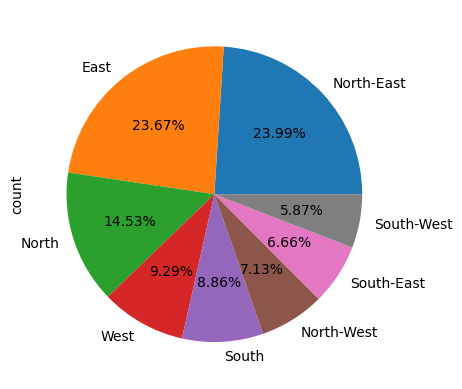

In [73]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [74]:
## Dropping facing column
df.drop(columns=['facing'],inplace=True)

df.sample(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1110,flat,shree vardhman flora,sector 90,1.00,5252.0,4.0,5.0,2,9.0,Relatively New,2133.0,1.0,1.0,0.0,0.0,0.0,1.0,110.0
1648,house,independent,sector 13,0.45,4808.0,1.0,1.0,0,1.0,Undefined,936.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2682,flat,dlf new town heights,sector 90,1.00,6502.0,3.0,3.0,3+,5.0,Relatively New,1929.0,0.0,1.0,0.0,1.0,0.0,1.0,127.0
3189,flat,signature global park,sohna road,5.00,6690.0,2.0,2.0,3,3.0,Undefined,7474.0,0.0,0.0,0.0,0.0,0.0,1.0,58.0
2609,flat,chd avenue,sector 71,7.00,6594.0,2.0,2.0,2,8.0,Relatively New,10616.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [75]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

## -------------------------- Society value Imputation -----------------------------

In [76]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1935,flat,NaN,sector 78,6.0,3692.0,2.0,2.0,0,2.0,Under Construction,16251.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [77]:
## Dropping Society Value
index = df[df['society'].isnull()].index
print(index)

## Dropping the recod with respective index
df.drop(index= index,inplace=True)

df.isnull().sum()

Index([1935], dtype='int64')


property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

## -------------------------- agePossession Missing Value Imputation ---------------------------

In [78]:
df['agePossession'].value_counts()

agePossession
Relatively New        1602
New Property           555
Moderately Old         542
Old Property           292
Undefined              291
Under Construction     264
Name: count, dtype: int64

In [79]:
## Fetching records where agePossession = Undefined
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
22,flat,trisara our homes 3,sohna road,3.00,6312.0,2.0,2.0,2,1.0,Undefined,4753.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
36,house,independent,sector 14,4.60,20444.0,1.0,1.0,0,1.0,Undefined,2250.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
43,flat,ramsons kshitij,sector 95,4.00,5839.0,3.0,2.0,2,6.0,Undefined,6850.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
46,flat,south city 1 floors,sector 41,3.00,11723.0,4.0,4.0,3,0.0,Undefined,2900.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
68,house,independent,sector 105,0.50,5556.0,2.0,2.0,0,1.0,Undefined,100.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3468,flat,m3m heights,sector 65,2.00,15198.0,3.0,3.0,3,44.0,Undefined,1653.0,0.0,0.0,0.0,0.0,0.0,1.0,56.0
3482,flat,signature global park,sohna road,5.00,7056.0,2.0,2.0,2,3.0,Undefined,7086.0,0.0,0.0,0.0,0.0,0.0,1.0,58.0
3499,house,independent,sector 55,2.80,18667.0,4.0,4.0,0,2.0,Undefined,1500.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3507,house,independent,sector 11,0.95,7308.0,5.0,3.0,0,1.0,Undefined,1300.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [80]:

## Filling Undefined Value based on sector and Property type (mode)
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [81]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

df['agePossession'].value_counts()

agePossession
Relatively New        1714
New Property           595
Moderately Old         581
Old Property           324
Under Construction     278
Undefined               54
Name: count, dtype: int64

In [82]:
## Filling Undefined Value based on sector 
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [83]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)
df['agePossession'].value_counts()

agePossession
Relatively New        1724
New Property           596
Moderately Old         588
Old Property           327
Under Construction     278
Undefined               33
Name: count, dtype: int64

In [84]:
## Filling Undefined Value based on Property type (mode)
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [85]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)
df['agePossession'].value_counts()

agePossession
Relatively New        1726
Moderately Old         619
New Property           596
Old Property           327
Under Construction     278
Name: count, dtype: int64

In [86]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [87]:
df.shape

(3546, 18)

In [88]:
df.to_csv(f'{file_path}/8.gurgaon_properties_missing_value_imputation.csv',index=False)
